In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [17]:
df=sns.load_dataset('iris')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [18]:
df['sepal_length']=df['sepal_length'].fillna(df['sepal_length'].mean())
df['petal_length']=df['petal_length'].fillna(df['petal_length'].mean())
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [20]:
df=pd.get_dummies(df,columns=['species'])

In [21]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df[['petal_length','sepal_length']]=scale.fit_transform(df[['petal_length','sepal_length']])

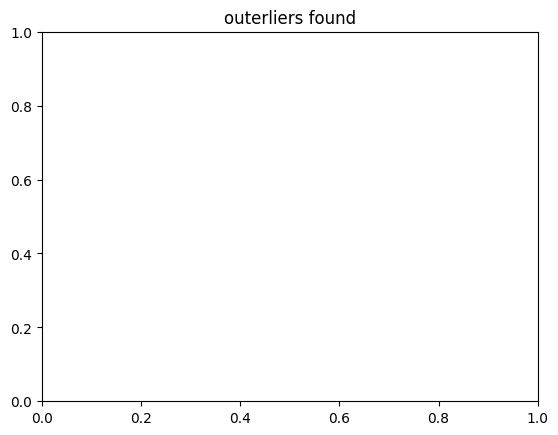

In [22]:
sns.boxplot(info=df[['petal_length','sepal_length']])
plt.title("outerliers found")
plt.show()

In [24]:
for i in ['petal_length','sepal_length']:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  lower=q1-1.5*iqr
  upper=q3+1.5*iqr
  df=df[(df[i]>=lower)&(df[i]<=upper)]

print("cleaned data:",df.shape)


cleaned data: (150, 7)
